<h1> 1. Modelos Autorregresivo de Medias Móviles ARMA(p,q) </h1>

Es la combinación de ambos modelos $AR(p)$ y $MA(q)$, con lo cual un modelo $ARMA(p,q)$ tendría dos órdenes $(p,q)$. Donde:
* $p$ es el orden de la parte autorregresiva.
* $q$ es el orden de laa parte de medias móviles. 

Un modelo $ARIMA(p,q)$ de orden simple, un $ARMA(1,1)$ sería de la siguiente manera:
$$x_t=c+\Phi _1x_{t-1}+\theta _1 \varepsilon _{t-1}+\varepsilon _t$$

De forma general, el modelo $ARMA(p,q)$ está dado de la siguiente manera:

$$x_t=c+\Phi _1x_{t-1}+\ldots +\Phi _p x_{t-p}+\theta _1 \varepsilon _{t-1}+\ldots + \theta _q\varepsilon _{t-q}+\varepsilon _t$$
Donde:

* $x_t,x_{t-1}$: Valores en el período actual y período anterior.
* $\varepsilon _t, \varepsilon _{t-1}$: Errores en el período actual y período anterior.
* $c:$ Constante.
* $\Phi _1,\ldots , \Phi _p :$ Que parte de los valores del período $p$ anterior es relevante para explicar el actual.
* $\theta _1,\ldots , \theta _q :$ Que parte de los residuos del período $q$ anterior es relevante para explicar el actual.




Nota: $x_t=\hat{x_t}+\varepsilon _T$

* Si $\theta >0$  y $x_t>\hat{x_t}$ entonces $\varepsilon _t>0$ así que $\theta \cdot \varepsilon _t>0$


* Si $\Phi _i<0$  y $x_{t-i}>0$ entonces $\Phi _i \cdot x_{t-i}$


<h2> Packages </h2>

In [27]:
import numpy as np #Importando numpy para Arreglos
import pandas as pd #Importando pandas para DataFrame
import matplotlib.pyplot as plt #Importando matplotlib para gráficas
import statsmodels.graphics.tsaplots as sgt #Gráficas de autocorrelación 
import statsmodels.tsa.stattools as sts #Para prueba de Dickey-Fuller
import seaborn as sns 
import warnings  #Para ignorar los errores en jupyternotebook
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA #Para modelo ARIMA
from scipy.stats.distributions import chi2 #Obtener distribucion xicuadrada
from datetime import datetime #Para trabajar con fechas
import os #Para poner la dirección donde esta la base de datos.
sns.set()
#Dirección en donde tengo las bases de datos.
os.chdir("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\curso-series-temporales-master\\5. Modelos AR autorregresivos\\Python") 

<h1> Preprocesamiento de datos </h1>

In [26]:
data = pd.read_csv("Index2018.csv") #Leer DataFrame Index2018
data_copia = data.copy() #Copia el DataFrame raw_csv_data con el nombre de df_comp
data_copia.date = pd.to_datetime(data_copia.date, dayfirst =True ) #Modifica las fechas
data_copia.set_index("date",inplace = True) # Ponemos las fechas como índices
data_copia = data_copia.asfreq("b") # Frecuencia
data_copia = data_copia.fillna(method = "ffill") #Arregla problema d valores faltantes tomando su diferencia
data_copia["market_value"]=data_copia.ftse #Agregamos una nueva columna
#llamada market_value tomando los valores de la columna ftse
del data_copia["spx"] #Eliminamos columna spx del DataFrame data_copia
del data_copia["dax"] #Eliminamos columna dax del DataFrame data_copia
del data_copia["ftse"]#Eliminamos columna ftse del DataFrame data_copia
del data_copia["nikkei"]#Eliminamos columna nikkei del DataFrame data_copia
size=int(len(df_comp)*0.8) #int (no. de filas*0.8)= int(6277*0.8)= int(5021.6)=5021
#Datos de entrenamiento y datos de prueba.
datos , datos_test = data_copia.iloc[:size], data_copia.iloc[size:]

<h1> Prueba de razón Log-LikeLihood </h1>

* $H_0:$ Los dos modelos son significativamente **iguales.**
* $H_a:$ Los dos modelos son significativamente **diferentes.**    

In [28]:
def LLR_test(mod_1,mod_2,DF=1): #DF son los grados de libertad
    L1=mod_1.llf # Me da Log Likelihood del mod_1 que de como entrada
    L2=mod_2.llf # Me da Log Likelihood del mod_2 que de como entrada
    LR=(2*(L2-L1)) # Estadístico de prueba
    p=chi2.sf(LR,DF).round(3) #P-valor
    return p

<h1> Creando Retornos </h1>

In [34]:
datos["retornos"]=datos.market_value.pct_change(1)*100
#Guardamos los retornos en la columna retornos del DataFrame datos
datos

,market_value,retornos
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
...,...,...
2013-03-22,6392.76,0.065899
2013-03-25,6378.38,-0.224942
2013-03-26,6399.37,0.329080


<h1> ARMA(1,1) </h1>

In [55]:
modelo_retornos_AR_1_MA_1 = ARIMA(datos.retornos[1:], order = (1,0,1))
#Omitimos el primer dato de la columna retornos porque es NA
resultados_retornos_AR_1_MA_1 = modelo_retornos_AR_1_MA_1.fit()
#Guardamos los valores ajustados del modelo ARMA(1,1)=ARIMA(1,0,1) 
resultados_retornos_AR_1_MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7907.666
Date:                Wed, 25 May 2022   AIC                          15823.333
Time:                        02:48:31   BIC                          15849.413
Sample:                    01-10-1994   HQIC                         15832.472
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.317      0.188      -0.009       0.048
ar.L1          0.7645      0.045     16.975      0.000       0.676       0.853
ma.L1         -0.8138      0.040    -20.167      0.000      -0.893      -0.735
sigma2         1.3721      0.014     98.083      0.000       1.345       1.400
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):              7492.48
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Observamos que:
* El coeficiente de $\Phi _1$ y $\theta _1$ son significativamente diferentes de $0$ y el coeficiente de $c$ es significativamente igual a $0$. Lo anterior, se ve ya sea por el $p-valor$ o por el intervalo de confianza.
* El coefiente de $\Phi _1$ tiene signo positivo y el de $\theta _1$ tiene signo negativo.

Ahora, debemos aplicar **Prueba de razón Log-LikeLihood** para comparar el modelo $ARMA(1,1)=ARIMA(1,0,1)$, uno a uno con sus versiones individuales. El Autorregresivo $AR(1)$ y el de Medias Móviles $MA(1)$ para determinar si la combinación de los dos es mejor modelo.


In [45]:
modelo_retornos_AR_1 = ARIMA(datos.retornos[1:], order = (1,0,0)) # AR(1)
modelo_retornos_MA_1 = ARIMA(datos.retornos[1:], order = (0,0,1)) # MA(1)
resultados_retornos_AR_1 = modelo_retornos_AR_1.fit()
resultados_retornos_MA_1 = modelo_retornos_MA_1.fit()
print("AR(1) vs ARMA(1,1)")
print(f"p-valor={LLR_test(resultados_retornos_AR_1, resultados_retornos_AR_1_MA_1)}\n ")
print("MA(1) vs ARMA(1,1)")
print(f"p-valor={LLR_test(resultados_retornos_MA_1, resultados_retornos_AR_1_MA_1)}")

AR(1) vs ARMA(1,1)
p-valor=0.0
 
MA(1) vs ARMA(1,1)
p-valor=0.0


Compararando el modelo $ARMA(1,1)=ARIMA(1,0,1)$ con sus versiones individuales, obtenemos que su $p-valor$ en ambos da $0.00$, es decir, $p-valor<\alpha $, entonces, *Rechamos* $H_0$ en la prueba de **Prueba de razón Log-LikeLihood**  así que en las dos pruebas los modelos son diferntes. 

Por complejidad concluimos que es mejor modelo $ARMA(1,1)$ en este caso.

Nota: Observamos que el modelo $AR(1,1)$ tiene $2$ grados de libertad y el modelo $AR(1)$ tiene $1$ grado de libertad, por eso seguimos poniendo $DF=1$

<h1> Ajustando un modelo ARMA(p,q) </h1>

Anteriormente propusimos el modelo $ARMA(1,1)$ o sea, el modelo más simple. Para el procedimiento de comparación de la **Prueba de razón Log-LikeLihood** se propuso los modelos indivuales de cada modelo implicado, es decir, $AR(1)$ y $MA(1)$, sin embargo con los modelos $ARMA(p,q)$ se están combinando ambos modelos, tanto la parte autorregresiva $AR(p)$ como la parte de medias móviles $MA(q)$. 

ARMA(p,q) tiene más "potencia" que solamente aplicar el modelo $AR(p)$ o $MA(q)$ por separado, así que los $ARMA(p,q)$ necesitan menos retrasos ($p,q$) porque se utilizando los dos métodos.

Con lo anterior, ya no nos basaremos en los valores que obteniamos a través de la gráfica de $PACF$ para el valor de $p$ del modelo $AR(p)$ ni con la gráfica de $ACF$ para el valor de $q$ del modelo $MA(q)$, ahora se va a comenzar con un modelo **sobreparametrizado**, es decir, consideraremos varios retrasos tanto para el componente autoregresivo $AR(p)$ como para el de medias móviles $MA(q)$

(a) Obtener un modelo parametrizado.


(b) Los modelos siguientes a considerar serán caracterizados por una disminución del número de componentes, es decir, se disminuye hasta el más simple.

Para que un modelo sea adecuado, tendrá que cumplir lo siguiente.
1. TODOS los coeficientes significativos.
2. Alta log-verosimilitud.
3. Bajo criterio de Información (AIC o BIC)

<h1> Gráfica $ACF$ y $PACF$ </h1>
Los gráficos nos dan una idea de cual serían el número correcto de retrasos si sólo incluyéramos los componentes de Medias Móviles y de los componentes de Autorregresivos

Recordemos que:
* Para obtener el valor de $p$ del modelo $AR(p)$ nos basamos en la gráfica de $PACF$, ver hasta que período los datos son significativos, es decir, mayor a la franja azul. 

* Para obtener el valor de $q$ del modelo $MA(q)$ nos basamos en la gráfica de $ACF$, ver hasta que período los datos son significativos, es decir, mayor a la franja azul.

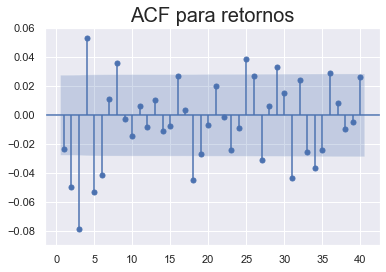

In [51]:
sgt.plot_acf(datos.retornos[1:], zero = False, lags = 40)
plt.title("ACF para retornos", size = 20)
plt.ylim(-0.09,0.06)
plt.show()

Para esta gráfica tendríamos que el moelo $MA(q)$ no contenga más de $8$ componentes, porque observamos que $\varphi _8$ es significativo y los demás componetes $\varphi _9,\ldots ,\varphi _{17}$ NO son significativos (porque están dentro de la franja azul). 
 
 Así que propondríamos un modelo $MA(8)$

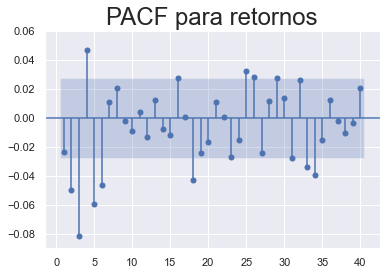

In [54]:
sgt.plot_pacf(datos.retornos[1:], zero = False, lags = 40, alpha =0.05, method = ("ols"))
plt.title("PACF para retornos", size = 24)
plt.ylim(-0.09,0.06)
plt.show()

Para esta gráfica tendríamos que el moelo $AR(p)$ no contenga más de $6$ componentes, porque observamos que $\varphi _6$ es significativo y de los componetes $\varphi _7,\ldots ,\varphi _{17}$ NO son significativos (porque están dentro de la franja azul).

Así que propondríamos un modelo $AR(6)$


De lo anterior, sería "lógico" tener un modelo $ARMA(6,8)$, el cual se expresaría de la siguiente manera:
$$x_t=c+\Phi _1x_{t-1}+\cdots + \Phi _6x_{t-6}+\theta _1\varepsilon _{t-1}+\cdots + \theta _8 \varepsilon _{t-8}+\varepsilon _t$$Este modelo es  excesivamente complejo ya que tendríamos que calcular $15$ coeficientes, pero como estamos tomando la combinación de los dos modelos $AR(p)$ y $MA(q)$ se tiene que **sobrparametrizar** con la finalidad de obtener un **MODELO PARAMETRIZADO**.

Una manera de hacerlo es : $$ARMA\left( \frac{min\{ p,q\} }{2}, \frac{min\{p,q\} }{2} \right)$$

En el caso anterior, teniamos que $p=6$ y $q=8$, así que:

$$\begin{array}{l} &ARMA \left( \frac{min\{ 6,8\} }{2}, \frac{min\{6,8\} }{2} \right) \\ &ARMA \left( \frac{6}{2}, \frac{6 }{2} \right)  \\ \therefore &ARMA(3,3) \;\;\; \textit{ Modelo parametrizado} \end{array}$$

<h1> Prueba de razón Log-LikeLihood </h1>

* $H_0:$ Los dos modelos son significativamente **iguales.**
* $H_a:$ Los dos modelos son significativamente **diferentes.** 

Esta prueba solo funciona para **MODELOS ANIDADOS**, es decir, supongamos que queremos compara los modelos $Modelo_1 = ARIMA(p_1,d,q_1)$ vs $Modelo _2= ARIMA(p_2,d,q_2)$, entonces tendrán que tener las siguientes características:

Ojo: El $Modelo_1$ es el más complejo de los dos.

1. $p_1+q_1\geq p_2+q_2$
2. $p_1 \geq p_2$
3. $q_1 \geq q_2$

Sino cumple lo anterior, entonces tendremos que comparar cual de los dos modelos tiene mayor **Log Likelihood** y menor **AIC**, quien cumpla es el mejor modelo. 




Realizamos esta prueba para observar si el modelo $ARMA(3,3)$ es mejor sus modelos "anteriores", es decir, $ARMA(2,3)$ , $ARMA(3,2)$, etc. 

EL modelo $ARMA(3,3)$ es el máximo modelo que ocuparemos, por ende se compara como modelos menores a el.


$ARMA(1,1)$ vs $ARMA(3,3)$

In [62]:
modelo_retornos_AR_3_MA_3 = ARIMA(datos.retornos[1:], order = (3,0,3))
resultados_retornos_AR_3_MA_3 = modelo_retornos_AR_3_MA_3.fit() 
print(f"{resultados_retornos_AR_3_MA_3.summary()}")
print(f"{LLR_test(resultados_retornos_AR_1_MA_1,resultados_retornos_AR_3_MA_3,DF=4)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7884.795
Date:                Wed, 25 May 2022   AIC                          15785.590
Time:                        02:58:49   BIC                          15837.749
Sample:                    01-10-1994   HQIC                         15803.868
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.311      0.190      -0.010       0.048
ar.L1         -0.1891      0.068     -2.790      0.005      -0.322      -0.056
ar.L2         -0.2939      0.054     -5.394      0.0

Observamos que:
*$DF=4$, e este caso, ya que $ARMA(3,3)$ tiene $6$ grados de libertad y $ARMA(1,1)$ solo $2$ grados de libertad.
* Solamente el coeficiente $c$ del modelo $ARMA(3,3)$ es significativamente igual a $0$.
*  Por la **Prueba de razón Log-LikeLihood** obtenemos un $p-valor=0.0$, así que los modelos $ARMA(1,1)$ y $ARMA(3,3)$ son diferentes.

**Conclusión:** Como estamos utilizando retornos, entonces sea significativamente igual a $0$ el coeficiente $c$ del modelo, no importa demasiado. Así que el modelo $ARMA(3,3)$ es óptimo.

Checando los demás modelos, reduciendo componentes para ver que modelo es mejor.

$ARMA(2,3)$ vs $ARMA(3,3)$

In [66]:
modelo_retornos_AR_2_MA_3 = ARIMA(datos.retornos[1:], order = (2,0,3))
resultados_retornos_AR_2_MA_3 = modelo_retornos_AR_2_MA_3.fit() 
print(f"{resultados_retornos_AR_2_MA_3.summary()}")
print(f"{LLR_test(resultados_retornos_AR_2_MA_3,resultados_retornos_AR_3_MA_3)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7886.835
Date:                Wed, 25 May 2022   AIC                          15787.669
Time:                        03:34:44   BIC                          15833.309
Sample:                    01-10-1994   HQIC                         15803.663
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.252      0.211      -0.011       0.050
ar.L1         -0.5601      0.057     -9.766      0.000      -0.673      -0.448
ar.L2         -0.4186      0.066     -6.384      0.0

Observamos que:
*$DF=1$, ya que $ARMA(3,3)$ tiene $6$ grados de libertad y $ARMA(2,3)$ solo $5$ grados de libertad.
* Solamente el coeficiente $c$ del modelo $ARMA(2,3)$ es significativamente igual a $0$.
*  Por la **Prueba de razón Log-LikeLihood** obtenemos un $p-valor=0.043$, así que los modelos $ARMA(2,3)$ y $ARMA(3,3)$ son diferentes.

**Conclusión:** Como estamos utilizando retornos, entonces aunque sea significativamente igual a $0$ el coeficiente $c$ del modelo, no importa demasiado, por lo que el modelo $ARMA(2,3)$ es óptimo, pero como es diferente del modelo $ARMA(3,3)$ entonces por complejidad nos quedamos con el modelo $ARMA(3,3)$



$ARMA(3,2)$ vs $ARMA(3,3)$

In [67]:
modelo_retornos_AR_3_MA_2 = ARIMA(datos.retornos[1:], order = (3,0,2))
resultados_retornos_AR_3_MA_2 = modelo_retornos_AR_3_MA_2.fit() 
print(f"{resultados_retornos_AR_3_MA_2.summary()}")
print(f"{LLR_test(resultados_retornos_AR_3_MA_2,resultados_retornos_AR_3_MA_3)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7886.981
Date:                Wed, 25 May 2022   AIC                          15787.963
Time:                        03:39:11   BIC                          15833.603
Sample:                    01-10-1994   HQIC                         15803.956
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.016      1.240      0.215      -0.011       0.050
ar.L1         -0.6781      0.055    -12.284      0.000      -0.786      -0.570
ar.L2         -0.5080      0.063     -8.017      0.0

Observamos que:

* $DF=1$, ya que $ARMA(3,3)$ tiene $6$ grados de libertad y $ARMA(3,2)$ solo $5$ grados de libertad.
* Solamente el coeficiente $c$ del modelo $ARMA(2,3)$ es significativamente igual a $0$.
*  Por la **Prueba de razón Log-LikeLihood** obtenemos un $p-valor=0.043$, así que los modelos $ARMA(3,2)$ y $ARMA(3,3)$ son diferentes.

**Conclusión:** Como estamos utilizando retornos, entonces aunque sea significativamente igual a $0$ el coeficiente $c$ del modelo, no importa demasiado, por lo que el modelo $ARMA(3,2)$ es óptimo, pero como es diferente del modelo $ARMA(3,3)$ **por lo tanto por complejidad nos quedamos con el modelo $ARMA(3,3)$**



$ARMA(2,2)$ vs $ARMA(3,3)$

In [68]:
modelo_retornos_AR_2_MA_2 = ARIMA(datos.retornos[1:], order = (2,0,2))
resultados_retornos_AR_2_MA_2 = modelo_retornos_AR_2_MA_2.fit() 
print(f"{resultados_retornos_AR_2_MA_2.summary()}")
print(f"{LLR_test(resultados_retornos_AR_2_MA_2,resultados_retornos_AR_3_MA_3,DF=2)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7905.837
Date:                Wed, 25 May 2022   AIC                          15823.674
Time:                        03:43:07   BIC                          15862.794
Sample:                    01-10-1994   HQIC                         15837.383
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.315      0.188      -0.009       0.048
ar.L1         -0.0973      0.090     -1.078      0.281      -0.274       0.080
ar.L2          0.6976      0.066     10.567      0.0

Como el coeficiente del modelo Autorrregresivo $\Phi _1$ es significativamente igual a $0$, este modelo no es óptimo.

$ARMA(1,3)$ vs $ARMA(3,3)$

In [69]:
modelo_retornos_AR_1_MA_3 = ARIMA(datos.retornos[1:], order = (1,0,3))
resultados_retornos_AR_1_MA_3 = modelo_retornos_AR_1_MA_3.fit() 
print(f"{resultados_retornos_AR_1_MA_3.summary()}")
print(f"{LLR_test(resultados_retornos_AR_1_MA_3,resultados_retornos_AR_3_MA_3,DF=2)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7888.080
Date:                Wed, 25 May 2022   AIC                          15788.161
Time:                        03:45:42   BIC                          15827.281
Sample:                    01-10-1994   HQIC                         15801.870
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.293      0.196      -0.010       0.049
ar.L1         -0.4710      0.060     -7.904      0.000      -0.588      -0.354
ma.L1          0.4483      0.060      7.458      0.0

Observamos que:

* $DF=1$, ya que $ARMA(3,3)$ tiene $6$ grados de libertad y $ARMA(1,3)$ solo $4$ grados de libertad.
* Solamente el coeficiente $c$ del modelo $ARMA(1,3)$ es significativamente igual a $0$.
*  Por la **Prueba de razón Log-LikeLihood** obtenemos un $p-valor=0.037$, así que los modelos $ARMA(1,3)$ y $ARMA(3,3)$ son diferentes.

**Conclusión:** Como estamos utilizando retornos, entonces aunque sea significativamente igual a $0$ el coeficiente $c$ del modelo, no importa demasiado, por lo que el modelo $ARMA(1,3)$ es óptimo, pero como es diferente del modelo $ARMA(3,3)$ **por lo tanto por complejidad nos quedamos con el modelo $ARMA(3,3)$**



$ARMA(3,1)$ vs $ARMA(3,3)$

In [70]:
modelo_retornos_AR_3_MA_1 = ARIMA(datos.retornos[1:], order = (3,0,1))
resultados_retornos_AR_3_MA_1 = modelo_retornos_AR_3_MA_1.fit() 
print(f"{resultados_retornos_AR_3_MA_1.summary()}")
print(f"{LLR_test(resultados_retornos_AR_3_MA_1,resultados_retornos_AR_3_MA_3,DF=2)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7890.291
Date:                Wed, 25 May 2022   AIC                          15792.581
Time:                        03:46:45   BIC                          15831.701
Sample:                    01-10-1994   HQIC                         15806.290
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.276      0.202      -0.010       0.049
ar.L1         -0.5088      0.062     -8.177      0.000      -0.631      -0.387
ar.L2         -0.0640      0.009     -7.038      0.0

Observamos que:

* $DF=1$, ya que $ARMA(3,3)$ tiene $6$ grados de libertad y $ARMA(3,1)$ solo $4$ grados de libertad.
* Solamente el coeficiente $c$ del modelo $ARMA(3,1)$ es significativamente igual a $0$.
*  Por la **Prueba de razón Log-LikeLihood** obtenemos un $p-valor=0.004$, así que los modelos $ARMA(3,1)$ y $ARMA(3,3)$ son diferentes.

**Conclusión:** Como estamos utilizando retornos, entonces aunque sea significativamente igual a $0$ el coeficiente $c$ del modelo, no importa demasiado, por lo que el modelo $ARMA(3,1)$ es óptimo, pero como es diferente del modelo $ARMA(3,3)$ **por lo tanto, dada la complejidad nos quedamos con el modelo $ARMA(3,3)$**



$ARMA(4,3)$ vs $ARMA(3,3)$

In [71]:
modelo_retornos_AR_4_MA_3 = ARIMA(datos.retornos[1:], order = (4,0,3))
resultados_retornos_AR_4_MA_3 = modelo_retornos_AR_4_MA_3.fit() 
print(f"{resultados_retornos_AR_4_MA_3.summary()}")
print(f"{LLR_test(resultados_retornos_AR_3_MA_3,resultados_retornos_AR_4_MA_3)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -7882.536
Date:                Wed, 25 May 2022   AIC                          15783.071
Time:                        03:53:23   BIC                          15841.751
Sample:                    01-10-1994   HQIC                         15803.635
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.311      0.190      -0.010       0.048
ar.L1          0.0961      0.099      0.969      0.333      -0.098       0.290
ar.L2         -0.0046      0.072     -0.064      0.9

En este caso, como los coeficientes $\Phi _1, \Phi _2, \theta _1, \theta _2$ son significativamente iguales a $0$, entonces el modelo $ARMA(4,3)$ no es óptimo. **Por lo tanto, nos seguimos quedando con el modelo $ARMA(3,3)$**


$ARMA(3,4)$ vs $ARMA(3,3)$

In [72]:
modelo_retornos_AR_3_MA_4 = ARIMA(datos.retornos[1:], order = (3,0,4))
resultados_retornos_AR_3_MA_4 = modelo_retornos_AR_3_MA_4.fit() 
print(f"{resultados_retornos_AR_3_MA_4.summary()}")
print(f"{LLR_test(resultados_retornos_AR_3_MA_3,resultados_retornos_AR_3_MA_4)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -7883.130
Date:                Wed, 25 May 2022   AIC                          15784.259
Time:                        03:57:21   BIC                          15842.939
Sample:                    01-10-1994   HQIC                         15804.823
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.307      0.191      -0.010       0.048
ar.L1          0.1518      0.119      1.278      0.201      -0.081       0.385
ar.L2         -0.0570      0.074     -0.768      0.4

En este caso, como los coeficientes $\Phi _1, \Phi _2, \theta _1, \theta _2$ son significativamente iguales a $0$, entonces el modelo $ARMA(3,4)$ no es óptimo. **Por lo tanto, nos seguimos quedando con el modelo $ARMA(3,3)$**


$ARMA(4,4)$ vs $ARMA(3,3)$

In [75]:
modelo_retornos_AR_4_MA_4 = ARIMA(datos.retornos[1:], order = (4,0,4))
resultados_retornos_AR_4_MA_4 = modelo_retornos_AR_4_MA_4.fit() 
print(f"{resultados_retornos_AR_4_MA_4.summary()}")
print(f"{LLR_test(resultados_retornos_AR_3_MA_3,resultados_retornos_AR_4_MA_4,DF=2)}")

                               SARIMAX Results                                
Dep. Variable:               retornos   No. Observations:                 5014
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -7880.399
Date:                Wed, 25 May 2022   AIC                          15780.797
Time:                        04:05:46   BIC                          15845.997
Sample:                    01-10-1994   HQIC                         15803.645
                         - 03-28-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0193      0.015      1.310      0.190      -0.010       0.048
ar.L1         -0.3630      0.180     -2.016      0.044      -0.716      -0.010
ar.L2         -0.0652      0.100     -0.651      0.5

En este caso, como los coeficientes $\Phi _1, \theta _1, \theta _2$ son significativamente iguales a $0$, entonces el modelo $ARMA(4,4)$ no es óptimo. **Por lo tanto, nos seguimos quedando con el modelo $ARMA(3,3)$**


<h1> Conclusión </h1>

Dado lo anterior, nuestro mejor modelo para pronosticar los retornos es $ARMA(3,3)$ que la obtendremos de la siguiente manera: $$x_t=c+\Phi _1x_{t-1}+\cdots + \Phi _3 x_{t-3}+\theta _1\varepsilon _{t-1}+\cdots +\theta _3\varepsilon _{t-3}+\varepsilon _t$$